In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## 1. Загрузка и чтение данных

In [2]:
url = "https://raw.githubusercontent.com/zaitcev-andrey/ML_and_DA/homework1/netflix-rotten-tomatoes-metacritic-imdb.csv"
data_raw = pd.read_csv(url)
data_raw.shape

(15480, 29)

In [3]:
# уберём запятые и знаки доллара для того, чтобы функция describe() ниже смогла обработать этот столбец, так как она работает
# с числовыми данными
data_raw["Boxoffice"] = data_raw["Boxoffice"].apply(lambda v: float(str(v).replace(",", "").replace("$", "")))
data_raw["binary_boxoffice"] = np.where(data_raw["Boxoffice"] >= 1000000, 1, 0) # заменим 1 все суммы, которые >= 1000000, а 0 все остальные
# избавляемся от ненужных признаков
data_raw.drop(['Netflix Link', 'IMDb Link', 'Summary', 'Image', 'Poster', 'TMDb Trailer', 'Trailer Site'], axis=1, inplace = True)

In [4]:
data_raw.shape

(15480, 23)

Признаки:  
Title - Название фильма или сериала  
Genre - Жанр  
Tags - Частые теги по жанрам  
Languages - Языки  
Series or Movie - Сериалы или фильмы  
Hidden Gem Score - Низкое количество отзывов и высокий рейтинг  
Country Availability - Доступность в стране  
Runtime - Длительность по времени фильма или серии  
Director - Режисёр  
Writer - Сценарист  
Actors - Актеры, появляющиеся в фильмах или сериалах  
View Rating - Система оценки фильмов Ассоциации кинематографистов  
IMDb Score - Оценка от IMDb  
Rotten Tomatoes Score - Оценка от Rotten Tomatoes  
Metacritic Score - Оценка от Metacritic  
Awards Received - Количество полученных наград (Оскар, Золотой глобус и др.)  
Awards Nominated For - Номинация в получении награды (Оскара, Золотого глобуса и др.)  
Boxoffice - Кассовые сборы  
Release Date - Дата выхода фильма или сериала  
Netflix Release Date - Дата выхода фильма или сериала на Нетфликс  
Production House - Кампании производители фильмов или сериалов  
IMDb Votes - Голоса от IMDb  
binary_boxoffice - бинарные кассовые сборы (1, если сборы больше >= 1000000, и 0, если <)

In [5]:
# Преобразуем следующие типы к категорильным
data_raw['Series or Movie'] = data_raw['Series or Movie'].astype('category')
data_raw['Runtime'] = data_raw['Runtime'].astype('category')

## 2. Обработка пропущенных значений

In [6]:
# Эта функция заменит в таблице значения с Nan на True, а все остальные значения на False
data_raw.isna()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,IMDb Votes,binary_boxoffice
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,True,...,True,True,False,True,True,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,True,...,True,True,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,False,True,False,True,False,True,False,False,True,True,...,True,True,True,True,True,True,False,True,True,False
15476,False,True,False,True,False,True,False,False,True,True,...,True,True,True,True,True,True,False,True,True,False
15477,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,True,False,False
15478,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,False,False,False


In [7]:
# Покажем сколько пропусков есть в каждом признаке(столбце)
data_raw.isna().sum()

Title                        0
Genre                     1710
Tags                        67
Languages                 1935
Series or Movie              0
Hidden Gem Score          2101
Country Availability        19
Runtime                      1
Director                  4708
Writer                    4330
Actors                    1925
View Rating               7024
IMDb Score                2099
Rotten Tomatoes Score     9098
Metacritic Score         11144
Awards Received           9405
Awards Nominated For      7819
Boxoffice                11473
Release Date              2107
Netflix Release Date         0
Production House         10331
IMDb Votes                2101
binary_boxoffice             0
dtype: int64

In [8]:
# Заполним медианами пропущенные значения в столбцах (поэтому axis = 0), соответствующих числовым признакам
data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)

In [9]:
data_raw.isna().sum()

Title                        0
Genre                     1710
Tags                        67
Languages                 1935
Series or Movie              0
Hidden Gem Score             0
Country Availability        19
Runtime                      1
Director                  4708
Writer                    4330
Actors                    1925
View Rating               7024
IMDb Score                   0
Rotten Tomatoes Score        0
Metacritic Score             0
Awards Received              0
Awards Nominated For         0
Boxoffice                    0
Release Date              2107
Netflix Release Date         0
Production House         10331
IMDb Votes                   0
binary_boxoffice             0
dtype: int64

In [10]:
# Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:
data_raw['Genre'].fillna(data_raw['Genre'].mode().iloc[0], inplace=True)
data_raw['Tags'].fillna(data_raw['Tags'].mode().iloc[0], inplace=True)
data_raw['Languages'].fillna(data_raw['Languages'].mode().iloc[0], inplace=True)
data_raw['Country Availability'].fillna(data_raw['Country Availability'].mode().iloc[0], inplace=True)
data_raw['Runtime'].fillna(data_raw['Runtime'].mode().iloc[0], inplace=True)
data_raw['Director'].fillna(data_raw['Director'].mode().iloc[0], inplace=True)
data_raw['Writer'].fillna(data_raw['Writer'].mode().iloc[0], inplace=True)
data_raw['Actors'].fillna(data_raw['Actors'].mode().iloc[0], inplace=True)
data_raw['View Rating'].fillna(data_raw['View Rating'].mode().iloc[0], inplace=True)
data_raw['Release Date'].fillna(data_raw['Release Date'].mode().iloc[0], inplace=True)
data_raw['Production House'].fillna(data_raw['Production House'].mode().iloc[0], inplace=True)

In [11]:
# Убеждаемся, что теперь пропусков нет
data_raw.isna().sum()

Title                    0
Genre                    0
Tags                     0
Languages                0
Series or Movie          0
Hidden Gem Score         0
Country Availability     0
Runtime                  0
Director                 0
Writer                   0
Actors                   0
View Rating              0
IMDb Score               0
Rotten Tomatoes Score    0
Metacritic Score         0
Awards Received          0
Awards Nominated For     0
Boxoffice                0
Release Date             0
Netflix Release Date     0
Production House         0
IMDb Votes               0
binary_boxoffice         0
dtype: int64

In [12]:
data_raw.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,IMDb Votes,binary_boxoffice
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,98.0,82.0,74.0,57.0,2122065.0,12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",205926.0,1
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,79.0,69.0,1.0,5.0,70632.0,08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",2838.0,0
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,64.0,46.0,3.0,5.0,16263.0,28 Aug 2020,2021-03-04,Netflix,1720.0,0
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,Steven Spielberg,Fujio F. Fujiko,...,64.0,57.0,1.0,5.0,19551067.0,01 Oct 2016,2021-03-04,Netflix,1147.0,0
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,Fujio F. Fujiko,...,64.0,57.0,3.0,4.0,19551067.0,22 Sep 2011,2021-03-04,Netflix,63.0,0


## 3. Подготовка данных

In [13]:
# Отберём подтаблицу с самыми нужными признаками и далее будем работать с ней
data_new = data_raw.loc[:, ['Title', 'Series or Movie', 'Hidden Gem Score', 'Runtime', 'IMDb Score',
                            'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received', 'Awards Nominated For',
                           'Boxoffice', 'Netflix Release Date', 'IMDb Votes', 'binary_boxoffice']].copy()

In [14]:
# Категориальный (Бинарный) признак 'Series or Movie' заменим на числовой.
data_new['Series or Movie'] = pd.factorize(data_new['Series or Movie'])[0] # 0 - series, 1 - movie

In [15]:
# К категориальному (небинарному) признаку 'Runtime' применим метод бинаризации (one-hot encoding)
Runtime_dummies = pd.get_dummies(data_new['Runtime'])

In [16]:
# Добавим эти dummy-столбцы к таблице и удалим столбец Runtime:
data_new = pd.concat((data_new, Runtime_dummies), axis=1)
data_new = data_new.drop(['Runtime'], axis=1)

In [17]:
data_new.head()

,Title,Series or Movie,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Netflix Release Date,IMDb Votes,binary_boxoffice,1-2 hour,30-60 mins,< 30 minutes,> 2 hrs
0,Lets Fight Ghost,0,4.3,7.9,98.0,82.0,74.0,57.0,2122065.0,2021-03-04,205926.0,1,0,0,1,0
1,HOW TO BUILD A GIRL,1,7.0,5.8,79.0,69.0,1.0,5.0,70632.0,2021-03-04,2838.0,0,1,0,0,0
2,Centigrade,1,6.4,4.3,64.0,46.0,3.0,5.0,16263.0,2021-03-04,1720.0,0,1,0,0,0
3,ANNE+,0,7.7,6.5,64.0,57.0,1.0,5.0,19551067.0,2021-03-04,1147.0,0,0,0,1,0
4,Moxie,1,8.1,6.3,64.0,57.0,3.0,4.0,19551067.0,2021-03-04,63.0,0,1,0,0,0


Проведём нормализацию количественных признаков

In [18]:
data_stand = (data_new - data_new.mean(axis = 0))/data_new.std(axis = 0)

## 4. Выбор тестовой и обучающей выборки

In [19]:
X = data_stand.drop(['IMDb Score', 'Netflix Release Date', 'Title', 'Boxoffice', 'binary_boxoffice'], axis=1)
y = data_new['binary_boxoffice']

In [20]:
print(X.shape)
print(y.shape)

(15480, 11)
(15480,)


Разобьем данные на обучающую (66%) и тестовую (33%) выборки:

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape

N_train, N_test

(10371, 5109)

## 5. Подбор гиперпараметров

В качестве solver выберем наиболее эффективный алгоритм 'Адам'
В качестве функции активации выберем 'Relu'
В качеcтве метрики оценки классификатора возьмем обычный accuracy_score, поскольку у нас 2 класса и классы сбалансированы.

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

### 5.1 Подбор количества нейронов в однослойной сети

In [23]:
hidden_layer_size = np.linspace(1, 50, 50)
hidden_layer_size = hidden_layer_size.astype(int)
test_err, train_err = [], []
train_acc, test_acc = [], []

for size in tqdm(hidden_layer_size):
    model = MLPClassifier(hidden_layer_sizes=(size,), 
                          solver='adam', activation='relu', max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

100%|██████████| 50/50 [03:17<00:00,  3.94s/it]


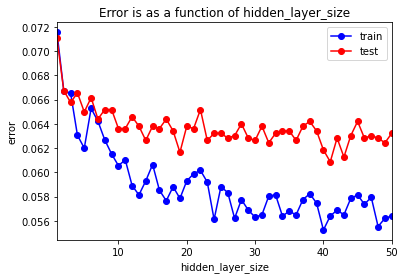

In [24]:
plt.plot(hidden_layer_size, train_err, 'b-o', label = 'train')
plt.plot(hidden_layer_size, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Error is as a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('error')
plt.legend()

In [25]:
print("Train: Min error={0}, number of neurons={1}".format(np.min(train_err), hidden_layer_size[np.argmin(train_err)]))
print("Test: Min error={0}, number of neurons={1}".format(np.min(test_err), hidden_layer_size[np.argmin(test_err)]))

Train: Min error=0.055250216951113686, number of neurons=40
Test: Min error=0.06087296926991583, number of neurons=41


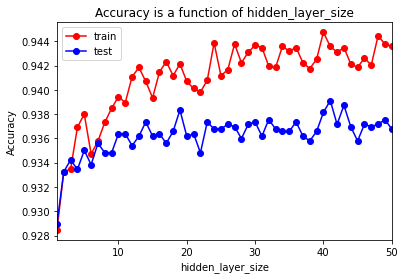

In [26]:
plt.plot(hidden_layer_size, train_acc, 'r-o', label = 'train')
plt.plot(hidden_layer_size, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Accuracy is a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('Accuracy')
plt.legend()

In [27]:
print("Train: max accuracy={0}, number of neurons={1}".format(np.max(train_acc), hidden_layer_size[np.argmax(train_acc)]))
print("Test: max accuracy={0}, number of neurons={1}".format(np.max(test_acc), hidden_layer_size[np.argmax(test_acc)]))

Train: max accuracy=0.9447497830488863, number of neurons=40
Test: max accuracy=0.9391270307300842, number of neurons=41


### 5.2 Подбор количества нейронов в двуслойной сети

In [28]:
n = 10
sizes = np.linspace(1, 50, n).astype(int)
test_err = np.zeros((n, n))
train_err = np.zeros((n, n))
train_acc = np.zeros((n, n))
test_acc = np.zeros((n, n))

for i, size_1 in tqdm(enumerate(sizes)):
    for j, size_2 in enumerate(sizes):
        model = MLPClassifier(hidden_layer_sizes=(size_1, size_2, ), 
                              solver='adam', activation='relu', max_iter=1000, random_state=42)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_err[i][j] = np.mean(y_train != y_train_pred)
        test_err[i][j] = np.mean(y_test != y_test_pred)

        train_acc[i][j] = accuracy_score(y_train, y_train_pred)
        test_acc[i][j] = accuracy_score(y_test, y_test_pred)

10it [11:34, 69.43s/it]


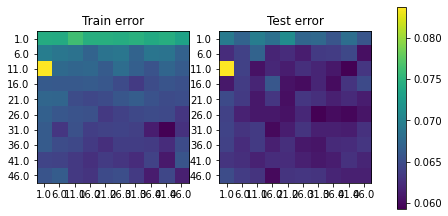

In [29]:
plt.subplot(121)
plt.title("Train error")
plt.imshow(train_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test error")
plt.imshow(test_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.96, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

train_min_loss = np.where(train_err == np.min(train_err))
test_min_loss = np.where(test_err == np.min(test_err))

train_min_loss_sizes = [train_min_loss[0][0] * 5, train_min_loss[1][0] * 5]
test_min_loss_sizes = [test_min_loss[0][0] * 5, test_min_loss[1][0] * 5]

In [30]:
print("Train: Min error={0}, number of neurons={1},{2}".format(np.min(train_err), train_min_loss_sizes[0], train_min_loss_sizes[1]))
print("Test: error={0}, number of neurons={1},{2}\n".format(test_err[train_min_loss][0], train_min_loss_sizes[0], train_min_loss_sizes[1]))
print("Test: Min error={0}, number of neurons={1},{2}".format(np.min(test_err), test_min_loss_sizes[0], test_min_loss_sizes[1]))
print("Train: error={0}, number of neurons={1},{2}\n".format(train_err[test_min_loss][0], test_min_loss_sizes[0], test_min_loss_sizes[1]))

Train: Min error=0.045993636100665314, number of neurons=30,40
Test: error=0.061264435310236835, number of neurons=30,40

Test: Min error=0.059307105108631825, number of neurons=10,40
Train: error=0.0581428984668788, number of neurons=10,40



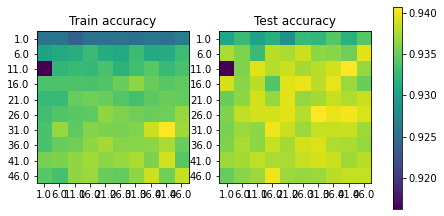

In [31]:
plt.subplot(121)
plt.title("Train accuracy")
plt.imshow(train_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test accuracy")
plt.imshow(test_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.95, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

train_max_acc = np.where(train_acc == np.max(train_acc))
test_max_acc = np.where(test_acc == np.max(test_acc))

train_max_acc_sizes = [train_max_acc[0][0] * 5, train_max_acc[1][0] * 5]
test_max_acc_sizes = [test_max_acc[0][0] * 5, test_max_acc[1][0] * 5]

In [32]:
print("Train: Max accuracy={0}, number of neurons={1},{2}".format(np.max(train_acc), train_max_acc_sizes[0], train_max_acc_sizes[1]))
print("Test: accuracy={0}, number of neurons={1},{2}\n".format(test_acc[train_max_acc][0], train_max_acc_sizes[0], train_max_acc_sizes[1]))
print("Test: Max accuracy={0}, number of neurons={1},{2}".format(np.max(test_acc), test_max_acc_sizes[0], test_max_acc_sizes[1]))
print("Train: accuracy={0}, number of neurons={1},{2}\n".format(train_acc[test_max_acc][0], test_max_acc_sizes[0], test_max_acc_sizes[1]))

Train: Max accuracy=0.9540063638993347, number of neurons=30,40
Test: accuracy=0.9387355646897632, number of neurons=30,40

Test: Max accuracy=0.9406928948913682, number of neurons=10,40
Train: accuracy=0.9418571015331212, number of neurons=10,40



### 5.3 Подбор параметра регуляризации

Лучшие показатели подемонстрировала сеть из 2-ух слоев (точность на тестовой и обучающей выборке у неё выше). Самая оптимальная точность достигается при количесте нейронов (30,40). Будем подбирать параметры alpha для сети из 2-ух слоёв.

In [43]:
alpha_arr = np.logspace(-3, 2, 50)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in tqdm(alpha_arr):
    mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(30,40),
                              solver='adam', activation='relu', max_iter=1000, random_state=42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

100%|██████████| 50/50 [03:24<00:00,  4.09s/it]


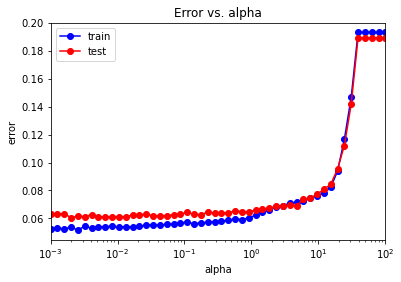

In [44]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

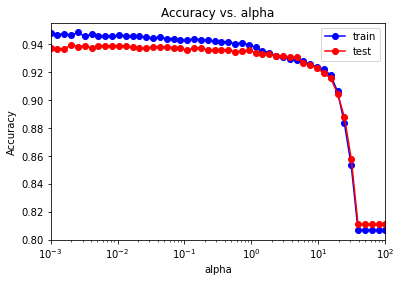

In [45]:
plt.semilogx(alpha_arr, train_acc, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Проделаем тоже самое для 10 нейронов

In [46]:
alpha_arr2 = np.logspace(-3, 2, 50)
test_err2 = []
train_err2 = []
train_acc2 = []
test_acc2 = []

for alpha in tqdm(alpha_arr2):
    mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(10,),
                              solver='adam', activation='relu', max_iter=1000, random_state=42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err2.append(np.mean(y_train != y_train_pred))
    test_err2.append(np.mean(y_test != y_test_pred))
    train_acc2.append(accuracy_score(y_train, y_train_pred))
    test_acc2.append(accuracy_score(y_test, y_test_pred))

100%|██████████| 50/50 [01:47<00:00,  2.15s/it]


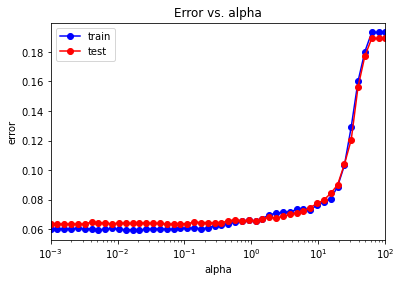

In [47]:
plt.semilogx(alpha_arr2, train_err2, 'b-o', label = 'train')
plt.semilogx(alpha_arr2, test_err2, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr2), np.max(alpha_arr2)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

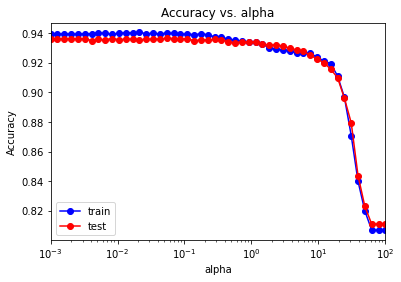

In [48]:
plt.semilogx(alpha_arr2, train_acc2, 'b-o', label = 'train')
plt.semilogx(alpha_arr2, test_acc2, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr2), np.max(alpha_arr2)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Из графиков видно, что при небольших значениях параметра регуляризации (когда alpha < 10), наблюдается высокая точность, но при alpha > 10 происходит резкое понижение точности, то есть наблюдается недообучение.  
Также из графиков 1 и 2 теста заметно, что результаты тестовой выборки приближены к результатам тренировочной, но всё-таки можно выделить оптимальное значение alpha = [1,5]  
В таком случае точность и на тестовой, и на обучающей выборке почти совпадает, и самое главное, что точность остаётся хоть и не на максимальном уровне (как при очень маленьких alpha), но всё также на очень высоком.

Возьмём в качестве оптимального значения alpha = 5

In [49]:
alpha_opt = 5
print("Alpha opt:", alpha_opt)

Alpha opt: 5


### 5.4 Классификатор при найденном оптимальном значении alpha:

In [50]:
mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(20,),
                          solver='adam', activation='relu', random_state=42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

### 5.5 Матрица рассогласования:

In [51]:
print(confusion_matrix(y_test_pred, y_test))

[[3956  183]
 [ 187  783]]


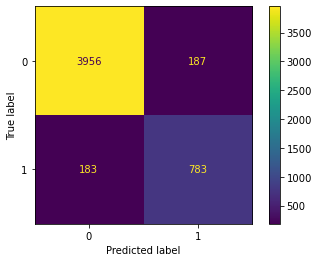

In [52]:
predictions = mlp_model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot()
plt.show()

## 6. Выводы

### 6.1 Подбор числа нейронов в однослойной моделе  
1) Графики Error и Accuracy для train и test почти зеркальны, что говорит об почти одинаковом распределении тренировочных и тестовых данных.  
2) Наблюдается переобучение. Результаты точности тренировной выборки оказались выше примерно на 1%, чем у тестовой. Это говорит об умении модели обучаться.  
3) За оптимальный размер скрытого слоя возьмём минимум ошибки и максимум точности на тестовой выборке 93.9% - 41 нейрон.  
4) При количестве нейровнов в слое больше 2 уже достигается точность выше 93%. Это говорит о том, что все входные объекты могут быть спроецированы в двумерное пространство и разделены на классы с высокой точностью 93%.  
### 6.2 Подбор числа нейронов в двуслойной моделе  
1) Наблюдается недообучение тренировочной выборки на 1%, по сравнению с тестовой (это видно из графиков, на тестовой выборке преобладает жёлтоватый цвет, в то время как на тренировочной зеленоватый)  
2) За оптимальные  размеры скрытых слоёв возьмём минимум ошибки и максимум точности на тестовой выборке 95% - 30 и 10 нейронов  
### 6.3) Подбор параметра регуляризации  
Как уже было замечено выше, с ростом коэффициента регуляризации растёт ошибка и соответственно снижается точность. Это говорит о том, что после обучения у модели не возникает больших значений весовых коэффициентов, а значит нет переобучения у модели. При alpha > 10e-1 начинается рост ошибки и снижение точности, то есть с ростом alpha веса модели уменьшаются и стремятся к нулю.